# Autograd: Automatic Differentiation

The autograd package provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

In [36]:
import torch

In [37]:
# Creating a 2x2 tensor with gradient-accumulation capabilities
x = torch.tensor([[1, 2], [3, 4]], requires_grad = True, dtype = torch.float32)
print(x)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [38]:
# performing an operation on the tensor
# deducting 2 from all the elements
y = x - 2
print(y)

tensor([[-1.,  0.],
        [ 1.,  2.]], grad_fn=<SubBackward0>)


In [39]:
# y is creates as a result of an operation, so it has a grad_fn
print(y.grad_fn)

In [40]:
print(x.grad_fn)

None


In [41]:
y.grad_fn

In [42]:
y.grad_fn.next_functions[0][0]

In [43]:
y.grad_fn.next_functions[0][0].variable

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

In [44]:
# do more operations on y
z = y * y * 3
a = z.mean() # average

print(z)
print(a)

tensor([[ 3.,  0.],
        [ 3., 12.]], grad_fn=<MulBackward0>)
tensor(4.5000, grad_fn=<MeanBackward0>)


In [45]:
# Visualising the computational graph
from torchviz import make_dot


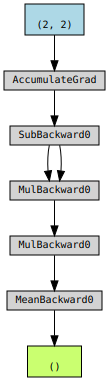

In [46]:
make_dot(a)

# Gradients

In [47]:
# out.backward() is equivalent to doing out.backward(torch.tensor([1.0]))
# backprop
a.backward()

In [48]:
#printing gradients
print(x.grad)

tensor([[-1.5000,  0.0000],
        [ 1.5000,  3.0000]])


In [49]:
# Dynamic Graphs
x = torch.randn(3, requires_grad =True)

y = x * 2
i = 0
while y.data.norm() < 1000:
    y = y * 2
    i += 1
print(y)

tensor([-267.7392,  852.7711, 1088.4725], grad_fn=<MulBackward0>)


In [50]:
# if we don't run backward on a scalar we need to specify the grad_output
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


In [51]:
print(i)

10


## Inference

In [52]:
# this decides the tensor's range below
n = 3

In [53]:
# both x and w that allows gradient accumulation
x = torch.arange(1., n+1, requires_grad = True)
w = torch.ones(n, requires_grad = True)
z = w @ x 
z.backward()
print(x.grad, w.grad, sep = '\n')

tensor([1., 1., 1.])
tensor([1., 2., 3.])


In [54]:
# only w that allows gradient accumulation
x = torch.arange(1., n+1)
w = torch.ones(n, requires_grad = True)
z = w @ x 
z.backward()
print(x.grad, w.grad, sep = '\n')

None
tensor([1., 2., 3.])


In [55]:
x = torch.arange(1., n + 1)
w = torch.ones(n, requires_grad = True)

with torch.no_grad():
    z = w @ x 

try:
    z.backward()
except RuntimeError as e:
    print('RuntimeError!!!')
    print(e)

RuntimeError!!!
element 0 of tensors does not require grad and does not have a grad_fn
